# Identify Fraud from Enron Dataset

#### December 13 2017

### John Ngo

In [163]:
# read in dataset and explore
# Import all required libraries to support our analysis


In [164]:
#!/usr/bin/python

# Import libraries

import sys
import pickle
import numpy as np
import pandas as pd

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

sys.path.append("../tools/")

# Import data formating functions from other files
# features_format in the tools directory

from feature_format import featureFormat, targetFeatureSplit

# in the final_project directory, tester file

from tester import dump_classifier_and_data

Populating the interactive namespace from numpy and matplotlib


In [165]:
    with open("final_project_dataset.pkl", "r") as data_file:
         enronData = pickle.load(data_file)

In [166]:
# print enronData

Printing enronData gave us an overview of the data we are working with.

In [167]:
# display the number of unique keys in the dataset

print len(enronData)

146


In [168]:
# display the list of the individual keys

# print enronData.keys()

Print enronData.keys() displays the key names of the individual that was part of the Enron organization.

In [169]:
# Select one of the unique keys and drill down and find the features associated with the unique keys

print len(enronData["LAY KENNETH L"])
print enronData["LAY KENNETH L"]

21
{'salary': 1072321, 'to_messages': 4273, 'deferral_payments': 202911, 'total_payments': 103559793, 'exercised_stock_options': 34348384, 'bonus': 7000000, 'restricted_stock': 14761694, 'shared_receipt_with_poi': 2411, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 49110078, 'expenses': 99832, 'loan_advances': 81525000, 'from_messages': 36, 'other': 10359729, 'from_this_person_to_poi': 16, 'poi': True, 'director_fees': 'NaN', 'deferred_income': -300000, 'long_term_incentive': 3600000, 'email_address': 'kenneth.lay@enron.com', 'from_poi_to_this_person': 123}


In [170]:
# Looking at corresponding values of the features inside of the unique keys

# enronData.values()

In [171]:
# convert dictionary to dataframe

df = pd.DataFrame.from_dict(enronData, orient = 'index')
# print df

In [172]:
# dataframa information
df = df.replace("NaN", np.nan)
df.info()

# count the values of the features and summing it up
count = sum(df.count())
count_nan = df.isnull().sum().sum()

print 'Total NaN: {} ({:.2%})'.format(count_nan, float(count_nan)/float(count+count_nan))
print "\nTotal not-null data points:", count

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
director_fees                17 non-null float64
deferred_income              49 non-null float

Based on our observation, as we notice total NaN for 1358(44.29%). We should not be using  loan_advances, director_fees, restricted_stock_deferred for the analysis since these features are not defined for the majority of entries.

In [173]:
# tallying up the values associated with the features

#df['bonus'].value_counts()

In [174]:
# finding out what type our features data belong to

# df.dtypes

In [175]:
# looking at the list of features from the dataframe perspective

df.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,9.500000e+01,86.000000,3.900000e+01,1.250000e+02,1.020000e+02,8.200000e+01,1.100000e+02,86.000000,1.800000e+01,1.260000e+02,9.500000e+01,4.000000e+00,86.000000,9.300000e+01,86.000000,1.700000e+01,4.900000e+01,6.600000e+01,86.000000
mean,5.621943e+05,2073.860465,1.642674e+06,5.081526e+06,5.987054e+06,2.374235e+06,2.321741e+06,1176.465116,1.664106e+05,6.773957e+06,1.087289e+05,4.196250e+07,608.790698,9.190650e+05,41.232558,1.668049e+05,-1.140475e+06,1.470361e+06,64.895349
std,2.716369e+06,2582.700981,5.161930e+06,2.906172e+07,3.106201e+07,1.071333e+07,1.251828e+07,1178.317641,4.201494e+06,3.895777e+07,5.335348e+05,4.708321e+07,1841.033949,4.589253e+06,100.073111,3.198914e+05,4.025406e+06,5.942759e+06,86.979244
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-7.576788e+06,-4.409300e+04,1.480000e+02,4.000000e+05,12.000000,2.000000e+00,0.000000,3.285000e+03,-2.799289e+07,6.922300e+04,0.000000
25%,2.118160e+05,541.250000,8.157300e+04,3.944750e+05,5.278862e+05,4.312500e+05,2.540180e+05,249.750000,-3.896218e+05,4.945102e+05,2.261400e+04,1.600000e+06,22.750000,1.215000e+03,1.000000,9.878400e+04,-6.948620e+05,2.812500e+05,10.000000
50%,2.599960e+05,1211.000000,2.274490e+05,1.101393e+06,1.310814e+06,7.693750e+05,4.517400e+05,740.500000,-1.469750e+05,1.102872e+06,4.695000e+04,4.176250e+07,41.000000,5.238200e+04,8.000000,1.085790e+05,-1.597920e+05,4.420350e+05,35.000000
75%,3.121170e+05,2634.750000,1.002672e+06,2.093263e+06,2.547724e+06,1.200000e+06,1.002370e+06,1888.250000,-7.500975e+04,2.949847e+06,7.995250e+04,8.212500e+07,145.500000,3.620960e+05,24.750000,1.137840e+05,-3.834600e+04,9.386720e+05,72.250000
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,3.117640e+08,9.734362e+07,1.303223e+08,5521.000000,1.545629e+07,4.345095e+08,5.235198e+06,8.392500e+07,14368.000000,4.266759e+07,609.000000,1.398517e+06,-8.330000e+02,4.852193e+07,528.000000


In [176]:
# checking out features list

features = list(df.keys())
print features
print len(features)

['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']
21


In [177]:
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,NaN,2195.0,152.0,65.0,False,NaN,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,NaN,257817.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,-560222.0,5243487.0,...,NaN,29.0,864523.0,0.0,False,NaN,-5104.0,NaN,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,...,NaN,NaN,2660303.0,NaN,False,NaN,-1386055.0,1586055.0,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,145796.0,NaN,-82782.0,63014.0,...,NaN,NaN,69.0,NaN,False,NaN,-201641.0,NaN,frank.bay@enron.com,NaN


In [178]:

# Determine the split between POIs / non POIs

print "Persons of interest Count:"
print df['poi'].value_counts()

print '\n'
print "Persons of interest Fraction:"
print df['poi'].value_counts(1)

Persons of interest Count:
False    128
True      18
Name: poi, dtype: int64


Persons of interest Fraction:
False    0.876712
True     0.123288
Name: poi, dtype: float64


# Outlier Analysis

It's important to check for outliers in the dataset. We will plot the total payment vs total stock value as they are the total of the financial features.




In [179]:
# print df.total_payments

In [180]:
# df.total_stock_value

In [181]:
# Converting our 'NaN' into 0 to convert to integer data

df.replace('NaN', 0, inplace = True)

In [182]:
df.dtypes

salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
exercised_stock_options      float64
bonus                        float64
restricted_stock             float64
shared_receipt_with_poi      float64
restricted_stock_deferred    float64
total_stock_value            float64
expenses                     float64
loan_advances                float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
poi                             bool
director_fees                float64
deferred_income              float64
long_term_incentive          float64
email_address                 object
from_poi_to_this_person      float64
dtype: object

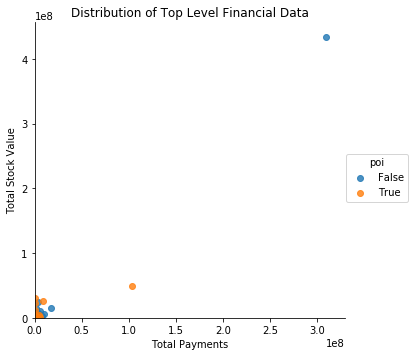

In [183]:
# Running a plot visualization, to determine our outliers


g = sns.lmplot('total_payments', 'total_stock_value', 
           data=df, 
           fit_reg=False,
           hue ='poi')

plt.title('Distribution of Top Level Financial Data')
plt.xlabel('Total Payments')
plt.ylabel('Total Stock Value')

g.set(ylim=(0, None))
g.set(xlim=(0, None))

# https://seaborn.pydata.org/generated/seaborn.lmplot.html

Based on our graph, we notice some points on the graph that seems suspect. Lets zoom in.

In [184]:
# Adding a parameter to zoom in our outliers

df[df['total_payments']>10000000]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
BHATNAGAR SANJAY,NaN,523.0,NaN,15456290.0,2604490.0,NaN,-2604490.0,463.0,15456290.0,NaN,...,NaN,29.0,137864.0,1.0,False,137864.0,NaN,NaN,sanjay.bhatnagar@enron.com,0.0
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,NaN,14622185.0,...,2000000.0,21.0,7427621.0,6.0,False,NaN,-3367011.0,1617011.0,mark.frevert@enron.com,242.0
LAVORATO JOHN J,339288.0,7259.0,NaN,10425757.0,4158995.0,8000000.0,1008149.0,3962.0,NaN,5167144.0,...,NaN,2585.0,1552.0,411.0,False,NaN,NaN,2035380.0,john.lavorato@enron.com,528.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0
TOTAL,26704229.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,...,83925000.0,NaN,42667589.0,NaN,False,1398517.0,-27992891.0,48521928.0,NaN,NaN


In [185]:
df['total_payments']> df[df['total_payments']>1e8]

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LAY KENNETH L,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TOTAL,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [186]:
# Get indexes
# df.index.values

https://en.wikipedia.org/wiki/Kenneth_Lay

Because Kenneth Lay was a central figure in the Enron scandal, it's important that we include it in our dataset. The 'Total' can be removed, because it's the sum of the values for the various individual in the dataset. As we inspected the PDF, we notice a row "The Travel Agency in the Park" in the following dataset which does not appear to be an Enron insider. The 'Total' and 'The Travel Agency in the Park' will be removed and replotted. 

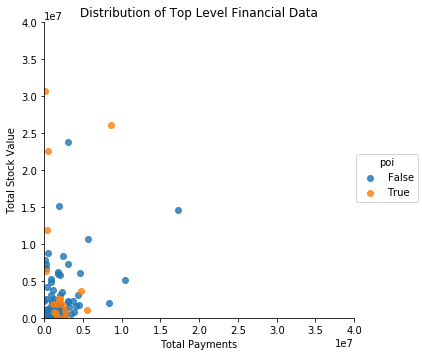

In [187]:
# Remove outliers and replot

df = df.drop(['TOTAL', 'THE TRAVEL AGENCY IN THE PARK'])

g = sns.lmplot('total_payments', 'total_stock_value', 
           data=df, 
           fit_reg=False,
           hue ='poi')

plt.title('Distribution of Top Level Financial Data')
plt.xlabel('Total Payments')
plt.ylabel('Total Stock Value')

g.set(xlim=(0, 0.4e8))
g.set(ylim=(0, 0.4e8))

# Feature Selection

Feature selection is selecting a feature which potentially would show some sort of pattern in the prediction analysis. Enron dataset consists two set of features - financial(salary bonuses, stock, etc) and communication(to and from emails). 

My assumption here is that communication between POI and POI would be more frequent than between POI and non-POIs. I am hoping to build an algorithm which would flag POIs among the population with good precision and recall score. I attempted to create two features, number of emails this person gets from POI(f_from_poi) and number of emails this person sends to POI(f_to_poi).

f_from_poi = number of emails this person gets from POI/total number of from messages

f_to_poi = number of emails this person sends to POI/total number sent messages

If email data is 'NaN', ratio is set to 0.

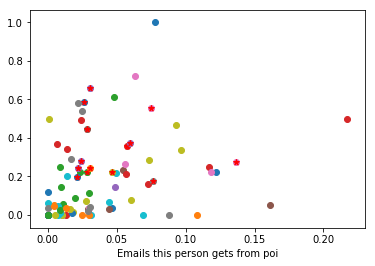

In [188]:
#Create new feature

#new features: 
# f_to_poi = number of emails sent to POIs, 
# f_from_poi = number of emails received  from POI

def dict_to_list(key,normalizer):
    new_list=[]

    for i in enronData:
        if enronData[i][key]=="NaN" or enronData[i][normalizer]=="NaN":
            new_list.append(0.)
        elif enronData[i][key]>=0:
            new_list.append(float(enronData[i][key])/float(enronData[i][normalizer]))
    return new_list

### create two lists of new features
f_from_poi = dict_to_list("from_poi_to_this_person","to_messages")
f_to_poi = dict_to_list("from_this_person_to_poi","from_messages")

### insert new features into enronData
count=0
for i in enronData:
    enronData[i]["f_from_poi"]=f_from_poi[count]
    enronData[i]["f_to_poi"]=f_to_poi[count]
    count +=1

features_list = ['poi','f_from_poi', 'f_to_poi','salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'director_fees', 'deferred_income', 'long_term_incentive']
 
# features_list = ["poi", "f_from_poi", "f_to_poi"] 

    ### store to my_dataset for easy export below
my_dataset = enronData


### these two lines extract the features specified in features_list
### and extract them from enronData, returning a numpy array
data = featureFormat(my_dataset, features_list)

### plot new features
for point in data:
    from_poi = point[1]
    to_poi = point[2]
    plt.scatter( from_poi, to_poi )
    if point[0] == 1:
        plt.scatter(from_poi, to_poi, color="r", marker="*")
plt.xlabel("Emails this person gets from poi")
plt.show()


In [189]:
print features_list

['poi', 'f_from_poi', 'f_to_poi', 'salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'director_fees', 'deferred_income', 'long_term_incentive']


In [190]:
# print my_dataset

# Original Features

In [191]:
from sklearn.cross_validation import train_test_split
from time import time

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# features_list
features_list = ['poi','salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'director_fees', 'deferred_income', 'long_term_incentive']

data = featureFormat(enronData, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'


# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Importance Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])
    
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(enronData, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )

dump_classifier_and_data(clf, my_dataset, features_list)

Accuracy: 0.827586206897
Precision:  0.25
Recall:  0.125
Decision Tree algorithm run time:  0.009 s
Feature Importance Ranking: 
1 feature salary (0.337437907714)
2 feature from_poi_to_this_person (0.161410018553)
3 feature from_this_person_to_poi (0.131818181818)
4 feature to_messages (0.124285714286)
5 feature deferral_payments (0.109563164109)
6 feature total_payments (0.101688311688)
7 feature exercised_stock_options (0.0337967018319)
8 feature bonus (0.0)
9 feature restricted_stock (0.0)
10 feature shared_receipt_with_poi (0.0)


# Add New Features

In [192]:
from sklearn.cross_validation import train_test_split
from time import time

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# features_list
# features_list = ['poi','salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'director_fees', 'deferred_income', 'long_term_incentive']

features_list = ['poi','f_from_poi', 'f_to_poi','salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'director_fees', 'deferred_income', 'long_term_incentive']


data = featureFormat(enronData, features_list)
labels, features = targetFeatureSplit(data)

# split data into training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'


# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Importance Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])
    
# pickle.dump(clf, open("my_classifier.pkl", "w") )
# pickle.dump(enronData, open("my_dataset.pkl", "w") )
# pickle.dump(features_list, open("my_feature_list.pkl", "w") )

# dump_classifier_and_data(clf, my_dataset, features_list)

Accuracy: 0.706896551724
Precision:  0.153846153846
Recall:  0.25
Decision Tree algorithm run time:  0.008 s
Feature Importance Ranking: 
1 feature f_from_poi (0.313857504724)
2 feature f_to_poi (0.168413165782)
3 feature salary (0.158023794387)
4 feature from_poi_to_this_person (0.151138471918)
5 feature from_this_person_to_poi (0.114411219033)
6 feature to_messages (0.0941558441558)
7 feature deferral_payments (0.0)
8 feature total_payments (0.0)
9 feature exercised_stock_options (0.0)
10 feature bonus (0.0)


After assessing the orignal feature and comparing it to the new feature, accuracy has declined from Accuracy: 0.827586206897 to Accuracy: 0.758620689655, Precision has improved from Precision:  0.25 to Precision:  0.3125 and Recall has improved as well from Recall:  0.125 to Recall:  0.625. We also see that our feature ranking has placed feature f_from_poi (0.257363998231) and feature f_to_poi (0.168413165782) at the top. As a result, I decided to use the new feature. 

In [193]:
# Replace np.nan with NaN (for compatibility with feature_format.py)

df.replace(np.nan, 'NaN', inplace = True)

# create a dictionary from the dataframe
df_dict = df.to_dict('index')


print df_dict["SKILLING JEFFREY K"]

{'salary': 1111258.0, 'to_messages': 3627.0, 'deferral_payments': 'NaN', 'total_payments': 8682716.0, 'loan_advances': 'NaN', 'bonus': 5600000.0, 'email_address': 'jeff.skilling@enron.com', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 26093672.0, 'shared_receipt_with_poi': 2042.0, 'long_term_incentive': 1920000.0, 'exercised_stock_options': 19250000.0, 'from_messages': 108.0, 'other': 22122.0, 'from_poi_to_this_person': 88.0, 'from_this_person_to_poi': 30.0, 'poi': True, 'deferred_income': 'NaN', 'expenses': 29336.0, 'restricted_stock': 6843672.0, 'director_fees': 'NaN'}


# Feature Engineering

This is the process where, we selected and kept only impactful features in our dataset which contribute maximum information to the prediction variable. We do not want features which do not provide decent information. Having irrelevant features in our data decreases accuracy and quality of analysis. Univariate feature selection works by selecting the best features based on univariate statistical tests. SelectKBest removes all but the k highest scoring features. Here I used SelectKBest to see high scoring features.

Secondly, I used feature importance attribute of decision tree and this helped me to select features which would give me maximum precision and recall scores. I also used manual feature selection process where I tried adding each features one by one and calculated precision and recall scores. More importantly it was very interesting to see that features including 'shared_receipt_with_poi',"exercised_stock_options" significantly increased precision and recall scores irrespective of the fact that they are not the top features in the selectKBest scores. Hence, features selected from this step were ["f_from_poi", "f_to_poi","shared_receipt_with_poi","exercised_stock_options"].

In [194]:
from sklearn.feature_selection import SelectKBest, f_classif
features_list = ["poi", "salary", "bonus", "f_from_poi", "f_to_poi",
                 'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
#deploying feature selection
## used selectkbest and feature importance attribute of decision tree

selector = SelectKBest(f_classif, k=5)
selector.fit(features, labels)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)
indices = np.argsort(scores)[::-1]
print 'selectKBest scores ranking: '
for i in range(16):
    print "{} feature {} ({})".format(i+1,features_list[i+1],scores[indices[i]])


from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

    
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier()
# clf.fit(features_train,labels_train)

# from sklearn.metrics import accuracy_score
# acc = accuracy_score(labels_test, pred)
# print 'Accuracy: ' + str(acc)
# print 'Precision: ', precision_score(labels_test, pred)
# print 'Recall: ', recall_score(labels_test, pred)
# print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'


# importances = clf.feature_importances_
# import numpy as np
# indices = np.argsort(importances)[::-1]
# print 'Feature importance Ranking: '
# for i in range(14):
#     print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

selectKBest scores ranking: 
1 feature salary (4.17424818808)
2 feature bonus (2.47526799584)
3 feature f_from_poi (1.14486649754)
4 feature f_to_poi (0.940272361115)
5 feature deferral_payments (0.337329786625)
6 feature total_payments (0.255505343107)
7 feature loan_advances (0.203646885336)
8 feature restricted_stock_deferred (0.198225231446)
9 feature deferred_income (0.193731697928)
10 feature total_stock_value (0.16482094858)
11 feature expenses (0.107627134646)
12 feature exercised_stock_options (0.0656280674818)
13 feature long_term_incentive (0.0546846481247)
14 feature shared_receipt_with_poi (0.0428473264338)
15 feature restricted_stock (0.0229248896842)
16 feature director_fees (0.00439829493019)


# Algorithm Selection and Tuning



What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?
What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well? How did you tune the parameters of your particular algorithm? What parameters did you tune?

In [195]:
features_list = ["poi", "salary","bonus","f_from_poi", "f_to_poi"]


##try Naive Bayes
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

t0 = time()
clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print "NAIVE BAYES:"
print "Naive Bayes recall score:", (recall_score(labels_test,pred))
print "Naive Bayes precision score:", (precision_score(labels_test,pred))
#print accuracy #(clf.score(features_test, labels_test))
accuracy = accuracy_score(pred,labels_test)
print 'accuracy:', accuracy
print "NB algorithm time:", round(time()-t0, 3), 's'

###Adaboost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split = 40),
                         algorithm="SAMME",
                         n_estimators=200)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

acc =  accuracy_score(pred,labels_test)
print "ADABOOST:"
print acc
print "AB Recall Score:", str(recall_score(labels_test, pred))
print "AB Precision Score:", str(precision_score(labels_test, pred))


##try Decision tree 
from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print'DECISION TREE: ' 
print "Decision tree algorithm time:", round(time()-t0, 3), "s"
print 'accuracy:',(score)
print 'recall score:', (recall_score(labels_test,pred))
print 'precision score:', (precision_score(labels_test,pred))

NAIVE BAYES:
Naive Bayes recall score: 0.0
Naive Bayes precision score: 0.0
accuracy: 0.266666666667
NB algorithm time: 0.007 s
ADABOOST:
0.933333333333
AB Recall Score: 0.0
AB Precision Score: 0.0
DECISION TREE: 
Decision tree algorithm time: 0.002 s
accuracy: 0.933333333333
recall score: 0.0
precision score: 0.0


# Final Algorithm Selection


I chose decision tree as a final algorithm. Algorithm performance can be measured in a variety of ways, e.g. accuracy, precision, or recall. Since there were few POI subjects in this dataset, precision and recall score were considered better evaluater than accuracy. Naive Bayes, decision tree and adaboost algorithms were tried using four best features. Adaboost and Naive Bayes showed recall score of less than 0.3. Decision tree is more efficient in finding irregular decision boundaries and does not need feature scaling as splitting of the data is based on a threshold value.

Parameter tuning means the adjustment of parameters in a certain way that it helps in better performance of algorithm. If parameter is not tuned algorithm may not perform well. In general algorithms are not specifically tuned to any dataset.

In parametere tuning process, we need to evaluate and validate our data for each different combination of selected parameters and see how well the algorithm performs until we are satisfied with. If algorithm is not tuned well, it won't be trained well and it would not be able to make predictions on the unseen data. Here, to optimize its performance, parameters min_sample_split was varied manually and performance evaluated. We found algorithm performed well when min_sample_split was kept at 3.

In [196]:
t0 = time()
param_grid = {
         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
            'max_features': range(3,10)
          }
clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf = clf.fit(features_train, labels_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_

done in 2.928s
Best estimator found by grid search:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [197]:

### use manual tuning parameter min_samples_split
from sklearn.tree import DecisionTreeClassifier
t0 = time()
# clf = DecisionTreeClassifier(min_samples_split = 1)
# clf = DecisionTreeClassifier(min_samples_split = 3)
# clf = DecisionTreeClassifier(min_samples_split = 4)
# clf = DecisionTreeClassifier(min_samples_split = 5)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)
print 'precision = ', precision_score(labels_test,pred)

# function for calculation ratio of true positives
# out of true positives and false negatives
print 'recall = ', recall_score(labels_test,pred)

### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(enronData, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )

done in 2.916s
Validating algorithm:
accuracy after tuning =  0.933333333333
precision =  0.0
recall =  0.0


# Analysis Validation and Performance

Analysis Validation and Performance
What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?
Validation is the process where we determine the robustness of our predictive models, i.e.,to test how well our model is trained.

A classic mistake in validation process is called over-fitting, where the model is trained and performs too good on the training dataset, but is actually worse on the cross-validation and test datasets. Besides, also if algorithm is tested in the same dataset as it was trained on it would give very high performance.

I used k-fold cross-validation. K-fold cross-validation method randomly divides the dataset into a test and training set k different times and let you decide how many trials to average at the end. You can also independently choose how large each test set is. In each trial, one of the k subsets is used as the test set and the other k-1 subsets are used as a training set.

In [198]:
### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label
features_list = ["poi", "salary","bonus","f_from_poi", "f_to_poi"]


### store to my_dataset for easy export below
my_dataset = enronData


### these two lines extract the features specified in features_list
### and extract them from enronData, returning a numpy array
data = featureFormat(my_dataset, features_list)


### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)


### machine learning goes here!
### please name your classifier clf for easy export below

### deploying feature selection
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

        
        
### use KFold for split and validate algorithm
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]        



from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print 'accuracy before tuning ', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"


### use manual tuning parameter min_samples_split
t0 = time()
clf = DecisionTreeClassifier(min_samples_split = 3)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)
print 'precision = ', precision_score(labels_test,pred)

# function for calculation ratio of true positives
# out of true positives and false negatives
print 'recall = ', recall_score(labels_test,pred)


### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(enronData, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )

accuracy before tuning  0.722222222222
Decision tree algorithm time: 0.003 s
done in 0.001s
Validating algorithm:
accuracy after tuning =  0.777777777778
precision =  0.166666666667
recall =  0.25


In [199]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
print "Number of observations: {}".format(len(features))

Number of observations: 108


# Conclusion

Give at least 2 evaluation metrics and your average performance for each of them. Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance.

I chose Decision Tree as a final algorithm to build a model to predict POIs from the population. In this case we used precision and recall as a measure of model performance. A good precision means if a person is identified as POI in the test will infact be POI. Low precision score can give false positive results which means innocent people can be flagged as POI.

If the precision score = 0.5, it means 50 percent of POI identified in the test would be the real POI whereas 50% of the time this test could flag a non POI. A good recall means relevant subjects from the population are all identified. If the recall score = 0.4, it means 60 percent of POI will go unidentified. In our case of POI identifier, it is more important to not miss any POIs than to flag non-POIs. So we prefer high recall. Decision tree performed best with the recall of 0.4 and precision value of 0.5. 

However, On checking the performance of my algorithm in tester.py's cross validation I got precision and recall of 0.418 and 0.31550 respectively.

The work in this notebook provided the steps for generating an Enron POI machine learning classifer. The data was analysed and cleaned and a new synthetic features were added. The data was then formatted for machine learning algorithms. A number of algorithms were tested and ultimately a decision tree classifier (DTC) was optimized using grid search cross validation. We were unable to achieve the desirable outcome after tuning our parameters, however, our desirable outcome was achieved without fine tuning our decision tree paramenters.

#### References


Udacity Tutorial - https://classroom.udacity.com/nanodegrees/nd002/parts/0021345409/modules/317428862475460/lessons/2258728540/concepts/24032586940923

Udacity Forum - https://discussions.udacity.com/t/how-to-go-about-p5/259206/25

Udacity Mentor - GEORGE ZHONGYUE
